<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL-project on Movies relational database
---

A relational database, also called Relational Database Management System (RDBMS) or SQL database, stores data in tables and rows also referred to as records. The most popular relational databases have been Microsoft SQL Server, Oracle Database, MySQL and IBM DB2. A relational database works by linking information from multiple tables through the use of “keys.” A key is a unique identifier which can be assigned to a row of data contained within a table.  The connection between the various keys between tables then creates the  “relationship” between records contained across multiple tables. The primary benefit of the relational database approach is the ability to create meaningful information by joining the tables.

SQL or Structured Query Languange is used to communicate with a database. SQL statements are used to perform tasks such as update data on a database, or retrieve data from a database.

##Using SQL in Python
In this project I will use Python SQL library for mysql.connector to 

* connect to the IMDb movies database and run the queries.
* reading data from across the tables in the movies database into one table that can be analysed with statistical tools in pandas.
* Do a few useful analyses and visualisation with the movies dataframe in pandas.


##SQL Libraries in Python

There are a number of varieties of SQL (Oracle SQL, mySQL, postgreSQL, etc) databases. Each has slight differences in the language used to interrogate databases.

One of the python SQL libraries, mysql.connector, will be used for this particular project.

Install the mysql.connector library.

In [2]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

     |████████████████████████████████| 11.9 MB 5.4 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=b975d1a56aabc81502f78e09a1318f33db94d6b7a61aa78940cfbf4d289902fb
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


#About the Data
---
IMDb (Internet Movie Database) is one of the most recognized names for its comprehensive online database collection of movies, films, TV series and so on. As of today (July 2020), you’ll see through the following data pull that IMDb database has approximately 7 million titles. IMDb has made essential susbsets of its database available for non-commercial use of the public. For this project, we will be using the IMDb dataset from Imdb_ijs (by Janez Kranjc).

https://relational.fit.cvut.cz/dataset/IMDb

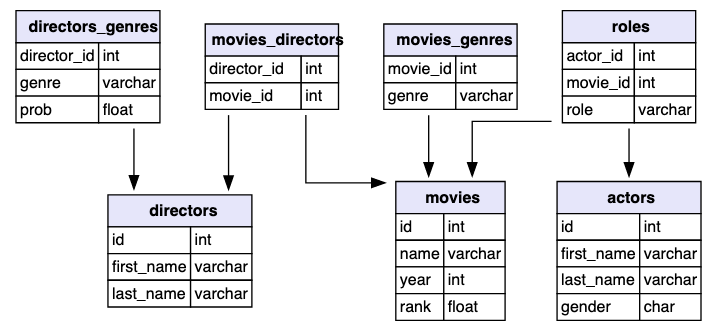

Before loading the dataset into pandas or use the functions of the mysql.connector let's import mysql.connector.

In [3]:
import mysql.connector

#Reading SQL database into python
---
1. Load in the IMDB database using the location of the database which is as follows:
```
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"
  ```

In [9]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

# add a function below here to execute a query (see above for code)
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None

Now that we have the tables, let's

* Run a query to get a count of rows
* Show the tables in the database
* Print the number of records in each of the tables

To make sure that the dataset is not empty!

In [10]:
def count_query(table_name):
  query3 = "SELECT COUNT(*) FROM " +table_name
  result = execute_query(query3)[0][0]
  return result

# run a query using the execute query function
query = "SHOW TABLES"
tables_imdb = execute_query(query)
print(tables_imdb)
for x in tables_imdb:
  table_name = x[:][0]
  tot_count = count_query(table_name)
  print("The number of records in ", table_name, " is ", tot_count)

[('actors',), ('directors',), ('directors_genres',), ('movies',), ('movies_directors',), ('movies_genres',), ('roles',)]
The number of records in  actors  is  817718
The number of records in  directors  is  86880
The number of records in  directors_genres  is  156562
The number of records in  movies  is  388269
The number of records in  movies_directors  is  371180
The number of records in  movies_genres  is  395119
The number of records in  roles  is  3431966


##Read the movies dataset using an SQL query into a pandas dataframe 
---
To read SQL query into a pandas dataframe we can use pd.read_sql_query(), giving it the query and the database.


Before we can use SQL query to get the dataset into pandas dataframe, we will need to import pandas. We also will need import files from google.colab so we can download the dataframe into csv file for future use.

In [14]:
import pandas as pd
from google.colab import files

In [15]:
def get_movies_data():
  query = """
    SELECT first_name, last_name, name, year, rank, genre 
    FROM directors, movies, movies_genres, movies_directors 
    WHERE movies.id = movies_directors.movie_id 
    AND movies.id = movies_genres.movie_id 
    AND directors.id = movies_directors.director_id
  """
  df = pd.read_sql_query(query, mydb)
  df. to_csv('movies.csv')
  files.download('movies.csv')
  return df



Let's check to see if we were successful.

In [13]:
# This code will test if movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

# This will show the first part of the dataframe
movies_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


,first_name,last_name,name,year,rank,genre
0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### Inspect the dataset 
---

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns

def get_data():
  !rm movies.csv
  # upload a set of chosen files then read a specified file
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
  return df 

mov_data = get_data()
print(mov_data.info())
print(mov_data.describe())

rm: cannot remove 'movies.csv': No such file or directory


Saving movies.csv to movies.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None
          Unnamed: 0           year           rank
count  368894.000000  368894.000000  113376.000000
mean   184446.500000    1969.442222       5.995124
std    106490.669438      29.082051       1.540330
min         0.000000    1888.000000       1.000000
25%     92223.250000    1947.000000       5.100000
50%    184446.500000    1976.000000       6.200000
75%    276669.750000    1996.000000       7.100000
max 

### Clean the dataset 
---


In [ ]:
mov_df = mov_data.drop_duplicates()
print(mov_df.info())

mov_df_rank = mov_df.dropna()
print(mov_df_rank.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float

Only the column of rank has null values. I prefer to keep the original data frame the same for all the other column calculations that doesn't involve rank. This is so that I do not lose other information. From here on, I will be using mov_df for all calculation that doesn't require the rank column. I will be using mov_df_rank for those that require rank column.

### How many movies of each genre are there?
---

In [ ]:
genres = mov_df['genre'].value_counts()
print(genres)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

A director who has done more movies will have different average (lower or higher dpending on the ratings) compared to someone who is done only 1 movie. Same holds for any single aggregate we try use. So I have decided to use more than one. 
Strategy is to use to more than one aggregate to decide on the top ranking director. So I will create a new data frame with all the aggregate and then sort the columns of aggregates.  
####So my selection criteria is:
The director should have made more than 1 movie and their median should be larger than mean.

In [ ]:
dir_df = mov_df_rank
dir_df['dir_name'] = mov_df_rank['first_name']+' ' + mov_df_rank['last_name']
dir_df =dir_df.drop(columns=['first_name', 'last_name'])
dir_rank = dir_df.groupby(['dir_name'])['rank'].max()
dir_ave = dir_df.groupby(['dir_name'])['rank'].mean()
dir_med = dir_df.groupby(['dir_name'])['rank'].median()
dir_count = dir_df.groupby(['dir_name'])['rank'].count()
index  = dir_rank.keys()
rank = list(dir_rank)
ave = list(dir_ave)
median = list(dir_med)
count = list(dir_count)
d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
top_dir = pd.DataFrame(data=d)
dir_toprank = top_dir.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 directors are:")
print(top_10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Top 10 directors are:
                dir_name  max_rank  mean_rank  median_rank  count
6418        Friz Freleng       8.4   6.718341          6.8   1025
3380     Chuck (I) Jones       9.0   6.944614          7.0    984
4102      Dave Fleischer       9.5   5.974526          5.9    738
17742    Robert McKimson       8.3   6.475897          6.5    697
20067          Tex Avery       8.9   7.029077          6.9    509
21429  William (I) Hanna       8.8   6.518496          6.6    492
10687     Joseph Barbera       8.8   6.538763          6.6    485
17628    Robert Clampett       9.1   7.181212          7.1    330
8604         Jack Kinney       8.7   6.591829          6.5    257
8554     Jack (I) Hannah       9.0   6.932016          6.9    253


Although the strategy and method seems reasonable. The dataframe has duplicates of the same movie but entered under different genres, leaving my aggregate evaluations with a bias!

So I will try to drop duplicates based on the name of the movie to remove the bias. This means that a movie is only listed once regardless of it's genre. This dataframe I cannot use to do genre calculations since I will be losing information on genres.

In [ ]:
dir_df =dir_df.drop_duplicates('name')
dir_rank = dir_df.groupby(['dir_name'])['rank'].max()
dir_ave = dir_df.groupby(['dir_name'])['rank'].mean()
dir_med = dir_df.groupby(['dir_name'])['rank'].median()
dir_count = dir_df.groupby(['dir_name'])['rank'].count()
index  = dir_rank.keys()
rank = list(dir_rank)
ave = list(dir_ave)
median = list(dir_med)
count = list(dir_count)
d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
top_dir = pd.DataFrame(data=d)
dir_toprank = top_dir.sort_values(["count", "median_rank"],ascending = (False, False))
top_10_dir = dir_toprank.head(10)
print("Top 10 directors are:")
print(top_10_dir)

Top 10 directors are:
              dir_name  max_rank  mean_rank  median_rank  count
5708      Friz Freleng       8.4   6.718800         6.80    250
2997   Chuck (I) Jones       9.0   6.940664         7.00    241
3647    Dave Fleischer       9.5   5.966667         5.80    219
15796  Robert McKimson       8.3   6.460234         6.50    171
17874        Tex Avery       8.9   7.027559         6.90    127
9529    Joseph Barbera       8.8   6.513115         6.60    122
9780       Jules White       8.5   6.593878         6.70     98
12542   Michael Curtiz       8.8   6.334091         6.45     88
10953  Lesley Selander       7.8   5.952874         6.00     87
3331     D.W. Griffith       8.0   6.000000         6.00     86


As expected, I get a different results for these two methods. But the top 5 still hold their place. Dave Fleischer and Tex Avery has lower median than average. This means that they have made more low rated movies. So based on my criteria, the director who has consistent results is Friz Freleng.  

### How many movies have ranks of over 9?
---


In [ ]:
mov_no_dup = mov_df_rank.drop_duplicates('name')
high_rank = mov_no_dup[mov_no_dup['rank'] > 9.0].count()
high_rank[0]

806

Many movie names are repeated by genre. So the actual number of movies with rating above 9 is smaller after removing duplicates.

### Plot a bar chart of mean rank and genre
---

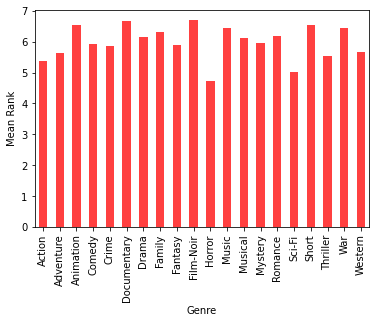

In [ ]:
rank_by_genre = mov_df_rank.groupby('genre')['rank'].mean()
bar_plot = rank_by_genre.plot(x="genre", y=rank_by_genre, kind="bar", alpha=0.75, rot=90, color = 'r')
bar_plot.set_xlabel("Genre")
bar_plot.set_ylabel("Mean Rank")
plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


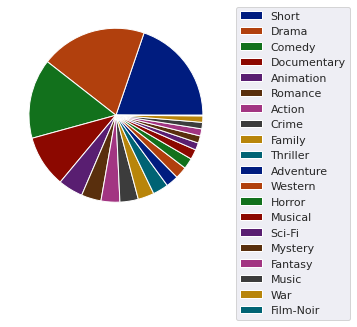

In [ ]:
x = genres.keys()
y = genres
sns.set(style="darkgrid")
colors = sns.color_palette('dark')
plt.pie(y, colors =colors)
plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Plot a graph showing the mean Rank for each year 

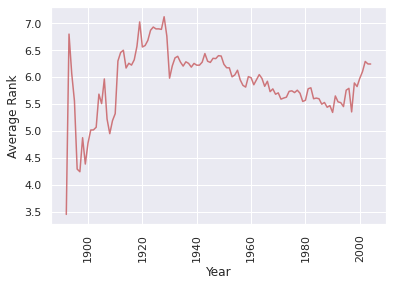

In [ ]:
rank_by_year = mov_no_dup.groupby('year')['rank'].mean()
line_plot = rank_by_year.plot(x="year", y=rank_by_year, kind="line", alpha=0.75, rot=90, color = 'r')
line_plot.set(xlabel="Year", ylabel="Average Rank")
plt.show()

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  Latest and oldest movies - movies after and before a certain release year.

  1.1 before 2000 by Jay

  1.2 In 2000 and after by Becky

2.  List of Movies by specific director.
3.  Plot the total number of movies released by year.

### Complete the tasks you have set out in the exercise above. 
---


###Task 1.1: Oldest movies - movies released before 2000

In [ ]:
no_dup = mov_df.drop_duplicates('name')
oldies = no_dup[no_dup['year']< 2000].count()
oldies[0]

164320

Again, duplicate count of movies are dropped.

###Task 2: Write a function to get list of movies by specific director

In [ ]:
def get_movies(df,dir_name):
  movies_list = df[df['dir_name']== dir_name]
  return movies_list

movies = get_movies(no_dup,"Quentin Tarantino")
movies_list = movies["name"]
print(movies_list)


328564                 Jackie Brown
328567            Kill Bill: Vol. 1
328570            Kill Bill: Vol. 2
328574    My Best Friend's Birthday
328576                 Pulp Fiction
328578               Reservoir Dogs
Name: name, dtype: object


###Task 3: Total number of movies by year:

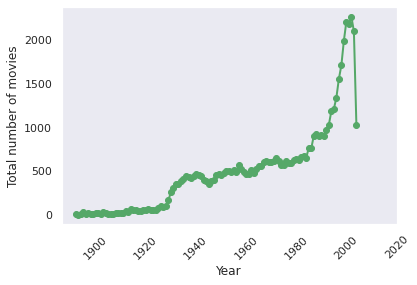

In [ ]:
import matplotlib.ticker as ticker
df_no_dup = mov_df_rank.drop_duplicates('name')
movie_by_year = df_no_dup.groupby('year')["name"].count()
year = np.array(movie_by_year.keys())
movie_year = np.array(list(movie_by_year))
plt.plot(year, movie_year, 'go-', linewidth =2)
plt.xlabel("Year")
plt.ylabel("Total number of movies")
plt.xticks(year)
plt.xticks([1900, 1920, 1940, 1960, 1980, 2000, 2020], rotation=45)
plt.grid()
plt.show()
#line_plot = movie_by_year.plot(x="year", y=movie_by_year, kind="line", alpha=0.75, rot=90, color = 'r')
#line_plot.set(xlabel="Year", ylabel="Total number of movies")
#plt.show()

###Task 4: Find top 10 highly ranked directors based on genre:

I will be keeping the strategy to find highly ranked directors the same, i.e., he/she should have directed more than 1 movie and their median rank should be larger than their average rank.

In [ ]:
def find_top(df, genre):
  df = df.loc[df['genre'] == genre]
  dir_rank = df.groupby(['dir_name'])['rank'].max()
  dir_ave = df.groupby(['dir_name'])['rank'].mean()
  dir_med = df.groupby(['dir_name'])['rank'].median()
  dir_count = df.groupby(['dir_name'])['rank'].count()
  index  = dir_rank.keys()
  rank = list(dir_rank)
  ave = list(dir_ave)
  median = list(dir_med)
  count = list(dir_count)
  d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
  top_dir = pd.DataFrame(data=d)
  return top_dir

dir_top = find_top(dir_df,'Animation')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Animation movie directors are:")
print(top_10)

Top 10 Animation movie directors are:
            dir_name  max_rank  mean_rank  median_rank  count
278     Friz Freleng       8.4   6.718800         6.80    250
151  Chuck (I) Jones       9.0   6.941423         7.00    239
187   Dave Fleischer       9.5   5.954378         5.80    217
733  Robert McKimson       8.3   6.460234         6.50    171
820        Tex Avery       8.9   7.027559         6.90    127
443   Joseph Barbera       8.8   6.513115         6.60    122
732  Robert Clampett       9.1   7.210256         7.20     78
372  Jack (I) Hannah       9.0   6.943750         6.95     64
375      Jack Kinney       8.7   6.518966         6.45     58
373    Jack (I) King       8.7   7.071429         7.10     49


In [ ]:
dir_top = find_top(dir_df,'Comedy')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Comedy movie directors are:")
print(top_10)

Top 10 Comedy movie directors are:
               dir_name  max_rank  mean_rank  median_rank  count
3622        Jules White       8.5   6.609278         6.80     97
936     Charles Chaplin       8.4   6.754545         6.70     66
1469           Del Lord       8.5   7.431111         7.70     45
6917   William Beaudine       7.6   5.997674         6.30     43
5733  Robert F. McGowan       9.5   7.923810         8.05     42
1692      Edward Bernds       8.5   6.675610         6.70     41
4969      Norman Taurog       6.9   5.543590         5.60     39
2315     Gordon Douglas       8.4   6.394444         6.70     36
4079        Lloyd Bacon       7.7   6.152778         6.10     36
1697    Edward F. Cline       8.4   6.938235         7.20     34


In [ ]:
dir_top = find_top(dir_df,'Drama')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Drama movie directors are:")
print(top_10)

Top 10 Drama movie directors are:
                dir_name  max_rank  mean_rank  median_rank  count
1206       D.W. Griffith       8.0   6.330357         6.30     56
4632      Michael Curtiz       8.8   6.341667         6.35     36
2003       Frank Borzage       9.3   6.432353         6.40     34
2752      Ingmar Bergman       8.4   7.066667         7.40     30
7128    William Dieterle       7.7   6.234483         6.00     29
1112      Claude Chabrol       7.7   6.450000         6.65     28
353        Andrzej Wajda       8.3   6.667857         6.60     28
3292       John (I) Ford       8.2   6.137037         6.30     27
1103  Clarence (I) Brown       7.7   6.628000         6.60     25
2592      Henry (I) King       7.6   6.444000         6.40     25


# Reflection
----

## What skills have you demonstrated in completing this notebook?

I have used my pandas skills to retrieve, clean, sort, wrangle and manipulate data. I have used pandas, seaborn and matlib to do visualisations. I worked with Becky today and we both had fun trying to do all the plots and exercises and also discussed different ways we both would do the same exercise.

## What caused you the most difficulty?

I wanted to create a list from the results of using a .groupby function and with Karen's help was able to figure it out. I tried using to_list but it was already stored as a list so I needed to only declare it as a list by using list() function. This was for execise 4 in this sheet. I wouldn't say this was in anyway difficult, but, this is the only place I was stuck on for a few mins in this worksheet.

###NOTE: 

I have added Task 4 like Lila suggested and have written a function that can find highest ranked director (based on the criteria I had set for exercise 4) by genres. Thanks, Karen and Lila, I had fun with this worksheet!